In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import preprocess
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import os
import matplotlib.pyplot as plt
import pickle

In [ ]:
column_header

['날짜', '시간', '시가', '고가', '저가', '종가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량']

In [3]:
!mkdir data

In [4]:
!unzip -qq -d data "/content/drive/MyDrive/캡스톤디자인프로젝트/data.zip"

In [21]:
# ['날짜', '시간', '시가', '고가', '저가', '종가', '거래량', '거래대금', '누적체결매도수량', '누적체결매수수량']
remastered_data = list()
file_path = 'data/{}'.format('/data/kosdaq')
column_header = None
file_name_list = os.listdir(file_path)

for i, file_name in tqdm(enumerate(file_name_list)):
# for i in tqdm(range(100, 200)):
    # file_name = os.listdir(file_path)[i]
    
    if (i % 300 == 0 and i != 0) or (i == len(file_name_list) - 1):
        with open('data_until_{}_without_date.pickle'.format(i), 'wb') as f:
            pickle.dump(remastered_data, f)
        remastered_data.clear()

    full_path = os.path.join(file_path, file_name)
    raw_df = pd.read_csv(full_path, encoding='euc-kr')

    if raw_df.empty:
        continue 

    time_in_str = raw_df.iloc[:, 1].astype(str).values

    data_per_day = list()
    data_row = list()

    next_expected_date = '20200730' # initial date
    next_expected_time = 9 * 60 + 1
    recent_row = ['20200730' + '_' + file_name, 541, 0, 0, 0, 0, 0, 0, 0, 0] # initialize recent row

    # In data of day, interpolate zero padding
    remastered_data.append(data_per_day)
    for j in range(raw_df.shape[0]):
        # append a list 'data per day', which is connected by pointer.
        data_row = raw_df.values[j].tolist()
        date = raw_df.iloc[j, 0]
        hour = int(time_in_str[j][:-2])
        minute = int(time_in_str[j][-2:])
        time_in_minutes = 60 * hour + minute
        data_row[1] = time_in_minutes
        data_row[0] = str(data_row[0]) + '_' + file_name

        # If 'Date' Changes and data_per_day list has any data
        if next_expected_date != date and data_per_day:
            data_per_day = data_per_day.copy() # Leave existing list pointer
            data_per_day = list()
            remastered_data.append(data_per_day)
            next_expected_date = date
            next_expected_time = time_in_minutes
            # next_expected_time = 541
            # recent_row = ['20200730', 541, 0, 0, 0, 0, 0, 0, 0] # initialize recent row
        
        # Data row Jump happened, interpolate zero padding.
        if next_expected_time != time_in_minutes:
            recent_row[6] = 0 # 거래량
            recent_row[7] = 0 # 거래대금
            while next_expected_time != time_in_minutes:
                recent_row[1] = next_expected_time # 시간

                data_per_day.append(recent_row[1:].copy())
                next_expected_time += 1
        
        data_per_day.append(data_row[1:])
        recent_row = data_row.copy()

        next_expected_time += 1
        next_expected_date = date

0it [00:00, ?it/s]

In [ ]:
data_row

[20200923, 1229, 992, 993, 987, 993, 5851, 5785000, 160029, 49189]

In [ ]:
indice = []
data_len = []
for i, each_data in enumerate(np_data):
    if len(each_data) != 390:
        data_len.append(len(each_data))
        indice.append(i)

In [ ]:
np.where(np.array(data_len) == 0)

(array([110, 313, 336]),)

In [ ]:
import pickle
with open('remastered_data.pickle', 'wb') as f:
    pickle.dump(remastered_data, f)

In [ ]:
import pickle
with open('remastered_data.pickle', 'rb') as file:
    remastered_data = pickle.load(file)

## Check data length distribution.

In [ ]:
indice = []
data_len = []
for i, each_data in enumerate(remastered_data):
    data_len.append(len(each_data))
    indice.append(i)

pd.Series(data_len).value_counts()

390    327428
388      1912
330      1394
389       938
1         443
        ...  
51          2
159         2
58          2
136         2
450         1
Length: 391, dtype: int64

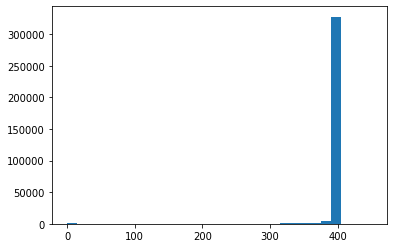

In [ ]:
l = plt.hist(data_len, bins=30)

## Abandon non-fully filled data

In [ ]:
full_data = []
column_len = []
for i, data in tqdm(enumerate(remastered_data)):
    if len(data) == 390:
        full_data.append(data)
        column_len.append(len(data[0]))

In [ ]:
full_data = np.array(full_data)

In [ ]:
full_data.shape

Error: Session cannot generate requests

In [ ]:
remastered_data.__len__()

331631

In [ ]:
indice = []
data_len = []
for i, each_data in enumerate(remastered_data):
    data_len.append(len(each_data))
    indice.append(i)

pd.Series(data_len).value_counts()

390    327428
1         218
388       189
389       136
387        88
        ...  
27          1
172         1
22          1
179         1
154         1
Length: 384, dtype: int64

In [22]:
with open('/content/data_until_300_without_date.pickle', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data

In [ ]:
data[0]

In [20]:
data.clear()